## Identificación de colonias con características similares

En este notebook se identificarán colonias con características similares a San Carlos Cantera, la cual se encuentra en el municipio de Ecatepec, Estado de México.

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import os
import requests
import zipfile
import folium
import matplotlib.pyplot as plt
from conda.common.url import maybe_unquote
from sklearn.cluster import KMeans
import numpy as np

In [79]:
os.makedirs("data", exist_ok=True)
#Función para descargar y extraer información de archivos zip
os.chdir("C:/Users/claud/Documents/Github/proyecto_simi")

In [80]:
#Función para descargar y extraer información de archivos zip

def download_and_extract(url, filename, check_file_path, extract_path):
    # Checar si el archivo ya existe
    if os.path.isfile(check_file_path):
        print(f"El archivo {filename} existe, no se descargará.")
    else:
        print(f"El archivo {filename} no existe. Descargando.")
        response = requests.get(url)
        with open(filename, "wb") as code:
            code.write(response.content)
        if zipfile.is_zipfile(filename):
            # extraer zip
            with zipfile.ZipFile(filename, "r") as zip_ref:
                zip_ref.extractall(extract_path)
        
        # Eliminar zip
            os.remove(filename)
        else:
            print("El archivo descargado no es un zip. Proceso terminado.")

In [81]:
#Lista de urls que se descargarán y extraerán
urls={"carto_colonias": "http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Colonia/imc2020_shp.zip",
      "mgn_inegi":"https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463807469/15_mexico.zip",
      "data_colonia": "http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Colonia/IMC_2020.zip",
      "data_mza": "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/ageb_manzana/RESAGEBURB_15_2020_csv.zip"}

In [82]:
#Descargar y extraer archivos

for key, value in urls.items():
    if key == "carto_colonias":
        download_and_extract(value, "data/cartografia_colonias.zip", "data/cartografia_colonias.zip", "data")
    elif key == "mgn_inegi":
        download_and_extract(value, "data/mgn_inegi.zip", "data/mgn_inegi.zip", "data")
    elif key == "data_colonia":
        download_and_extract(value, "data/data_colonia.zip", "data/data_colonia.zip", "data")
    elif key == "data_mza":
        download_and_extract(value, "data/data_mza.zip", "data/data_mza.zip", "data")

El archivo data/cartografia_colonias.zip no existe. Descargando.
El archivo data/mgn_inegi.zip no existe. Descargando.
El archivo data/data_colonia.zip no existe. Descargando.
El archivo data/data_mza.zip no existe. Descargando.


#### Tratamiento de datos de Censo a nivel manzana

#### Identificación de manzanas de la colonia San Carlos Cantera
##### Colonia

In [83]:
sancarloscantera= gpd.read_file("data/colonias_imc2020.shp")
#Columnas en minúsculas
sancarloscantera.columns=sancarloscantera.columns.str.lower()
sancarloscantera=sancarloscantera[(sancarloscantera["cve_mun"]=="15033") & (sancarloscantera["colonia"]=="Lomas de San Carlos")]
sancarloscantera

objectid     cve_col  id_col              colonia     cp cve_ent  \
30349     41423  15033_0266   41423  Lomas de San Carlos  55089      15   

      nom_ent  mun cve_mun              nom_mun  ...      ovpt      ovhac  \
30349  México  033   15033  Ecatepec de Morelos  ...  2.685449  38.288696   

          ovsref     ovsint    ovscel    im_2020  gm_2020  imn_2020   clasif  \
30349  10.016019  34.819876  8.615278  147.94471    Medio  0.943236  Colonia   

                                                geometry  
30349  POLYGON ((2808225.418 845891.380, 2808367.462 ...  

[1 rows x 32 columns]

##### Manzanas

In [84]:
mza=gpd.read_file("data/conjunto_de_datos/15m.shp")
mza.columns=mza.columns.str.lower()
#Filtrar cve_ent==15, cve_mun==033
mza=mza[(mza["cve_ent"]=="15") & (mza["cve_mun"]=="033")]
mza

cvegeo cve_ent cve_mun cve_loc cve_ageb cve_mza  ambito  \
32870  1503300013939064      15     033    0001     3939     064  Urbana   
32871  1503300013939061      15     033    0001     3939     061  Urbana   
32872  1503300013939062      15     033    0001     3939     062  Urbana   
32873  1503300014585014      15     033    0001     4585     014  Urbana   
32874  1503300014725038      15     033    0001     4725     038  Urbana   
...                 ...     ...     ...     ...      ...     ...     ...   
46463  1503300011472012      15     033    0001     1472     012  Urbana   
46464  1503300014778030      15     033    0001     4778     030  Urbana   
46465  1503300012593001      15     033    0001     2593     001  Urbana   
46466  1503300013939014      15     033    0001     3939     014  Urbana   
46467  1503300012593030      15     033    0001     2593     030  Urbana   

       tipomza                                           geometry  
32870   Típica  POLYGON ((2815245.472 850483.715, 2815211.405 ...  
32871   Típica  POLYGON ((2815372.536 850499.874, 2815354.425 ...  
32872   Típica  POLYGON ((2815391.190 850417.536, 2815361.418 ...  
32873   Típica  POLYGON ((2806270.572 849750.517, 2806267.836 ...  
32874   Típica  POLYGON ((2813062.006 848848.817, 2813074.946 ...  
...        ...                                                ...  
46463   Típica  POLYGON ((2809542.711 847842.736, 2809609.811 ...  
46464  Atípica  POLYGON ((2804367.806 841834.751, 2804389.742 ...  
46465   Típica  POLYGON ((2808629.353 848560.131, 2808650.800 ...  
46466   Típica  POLYGON ((2814888.519 850384.425, 2814901.141 ...  
46467   Típica  POLYGON ((2808122.068 848603.616, 2808376.201 ...  

[13598 rows x 9 columns]

##### Identificación de manzanas de San Carlos Cantera

In [85]:
lista_mza=gpd.sjoin(sancarloscantera, mza, how="inner", predicate="contains")
#Dejar solo cvegeo
lista_mza=lista_mza[["cvegeo"]]
#Filtrar manzanas de San Carlos Cantera en tabla de manzanas
sancarlosmza=mza[mza["cvegeo"].isin(lista_mza["cvegeo"])]
sancarlosmza

cvegeo cve_ent cve_mun cve_loc cve_ageb cve_mza  ambito  \
32984  1503300013623039      15     033    0001     3623     039  Urbana   
33055  1503300010243013      15     033    0001     0243     013  Urbana   
33229  1503300013604029      15     033    0001     3604     029  Urbana   
33701  1503300013619022      15     033    0001     3619     022  Urbana   
33881  1503300013623014      15     033    0001     3623     014  Urbana   
33882  1503300013623007      15     033    0001     3623     007  Urbana   
33884  1503300013623028      15     033    0001     3623     028  Urbana   
34222  1503300013623001      15     033    0001     3623     001  Urbana   
34223  1503300013623009      15     033    0001     3623     009  Urbana   
34224  1503300013623021      15     033    0001     3623     021  Urbana   
34834  1503300013623037      15     033    0001     3623     037  Urbana   
35020  1503300013619020      15     033    0001     3619     020  Urbana   
35159  1503300013604039      15     033    0001     3604     039  Urbana   
35553  1503300013623032      15     033    0001     3623     032  Urbana   
35554  1503300013623015      15     033    0001     3623     015  Urbana   
35555  1503300013623026      15     033    0001     3623     026  Urbana   
35587  1503300013623059      15     033    0001     3623     059  Urbana   
35588  1503300013623008      15     033    0001     3623     008  Urbana   
36081  1503300013623020      15     033    0001     3623     020  Urbana   
36329  1503300013623025      15     033    0001     3623     025  Urbana   
36404  1503300013623058      15     033    0001     3623     058  Urbana   
36427  1503300013623048      15     033    0001     3623     048  Urbana   
37047  150330001256A002      15     033    0001     256A     002  Urbana   
37056  1503300013623057      15     033    0001     3623     057  Urbana   
37252  1503300013623055      15     033    0001     3623     055  Urbana   
37253  1503300013623060      15     033    0001     3623     060  Urbana   
37254  1503300013623030      15     033    0001     3623     030  Urbana   
37255  1503300013623034      15     033    0001     3623     034  Urbana   
37256  1503300013623036      15     033    0001     3623     036  Urbana   
37257  1503300013623040      15     033    0001     3623     040  Urbana   
37258  1503300013623041      15     033    0001     3623     041  Urbana   
37259  1503300013623047      15     033    0001     3623     047  Urbana   
37260  1503300013623062      15     033    0001     3623     062  Urbana   
37261  1503300013623049      15     033    0001     3623     049  Urbana   
37262  1503300013623050      15     033    0001     3623     050  Urbana   
37263  1503300013623051      15     033    0001     3623     051  Urbana   
37812  1503300010243012      15     033    0001     0243     012  Urbana   
42277  150330001256A006      15     033    0001     256A     006  Urbana   
42278  150330001256A032      15     033    0001     256A     032  Urbana   
42720  150330001256A008      15     033    0001     256A     008  Urbana   
43024  1503300013623063      15     033    0001     3623     063  Urbana   
43347  150330001256A033      15     033    0001     256A     033  Urbana   
43348  150330001256A021      15     033    0001     256A     021  Urbana   
43411  1503300013623024      15     033    0001     3623     024  Urbana   
43412  1503300013623019      15     033    0001     3623     019  Urbana   
43413  1503300013623013      15     033    0001     3623     013  Urbana   
43414  1503300013623006      15     033    0001     3623     006  Urbana   
44942  1503300013623052      15     033    0001     3623     052  Urbana   
44943  1503300013623046      15     033    0001     3623     046  Urbana   
44944  1503300013623045      15     033    0001     3623     045  Urbana   
45037  1503300013623002      15     033    0001     3623     002  Urbana   
46290  1503300010243005      15     033    0001     0243     005 

In [86]:
mzadata=pd.read_csv("data/RESAGEBURB_15CSV20.csv")
mzadata.columns=mzadata.columns.str.lower()
#Filtrar mun=33
mzadata=mzadata[mzadata["mun"]==33]
#Eliminar agregados
#Eliminar agregados de entidad. 
mzadata=mzadata[mzadata['mun']!=0]
#Eliminar agregados de municipio. 
mzadata=mzadata[mzadata['loc']!=0]
#Eliminar agregados de localidad.
mzadata=mzadata[mzadata['ageb']!='0000']
#Eliminar agregados de manzana.
mzadata=mzadata[mzadata['mza']!=0]
#Crear clave geo
mzadata['cvegeo'] = mzadata['entidad'].astype(str).str.zfill(2) + mzadata['mun'].astype(str).str.zfill(3) + mzadata['loc'].astype(str).str.zfill(4) + mzadata['ageb'].astype(str).str.zfill(4) + mzadata['mza'].astype(str).str.zfill(3)

#Filtrar manzanas de la lista de manzanas de San Carlos Cantera
mzadata=mzadata[mzadata["cvegeo"].isin(lista_mza["cvegeo"])]

mzadata

entidad nom_ent  mun              nom_mun  loc              nom_loc  \
28785       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
28788       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
28791       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
28792       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
34835       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
34839       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
34841       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
34847       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
34851       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
34852       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38323       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38329       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38363       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38365       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38369       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38370       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38374       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38375       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38376       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38377       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38380       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38381       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38382       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38385       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38386       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38387       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38390       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38391       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38392       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38394       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38395       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38397       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38398       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38400       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38401       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38403       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38404       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38405       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38407       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38408       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38409       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38410       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38411       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38412       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38413       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38414       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38415       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38416       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38417       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38418       15  México   33  Ecatepec de Morelos    1  Ecatepec de Morelos   
38419       15  México   33  

In [87]:
#Obtener datos de población total
print(mzadata["pobtot"].sum())
print(sancarloscantera["pobtot"].sum())
print("Diferencia población  CONAPO vs. manzanas identificadas: ", mzadata["pobtot"].sum()-sancarloscantera["pobtot"].sum())
#Porcentaje de población de manzanas identificadas respecto a población de San Carlos Cantera
print("Porcentaje de población de manzanas identificadas respecto a población de Lomas de San Carlos: ", (mzadata["pobtot"].sum()/sancarloscantera["pobtot"].sum())*100)

5526
6937.19958
Diferencia población  CONAPO vs. manzanas identificadas:  -1411.1995800000004
Porcentaje de población de manzanas identificadas respecto a población de Lomas de San Carlos:  79.65750352536347


In [88]:
#Datos relevantes
print("Viviendas particulares habitadas: ", mzadata["tvivparhab"].astype(int).sum())
print("Promedio de ocupantes por vivienda: ",mzadata["pobtot"].sum()/mzadata["tvivparhab"].astype(int).sum())
print("Promedio de ocupantes por vivienda: ",mzadata["prom_ocup"].astype(float).mean())
print("Total de hogares: ",mzadata["tothog"].astype(int).sum())
print("Tasa de participación: ",mzadata["pea"].astype(int).sum()/mzadata["p_15ymas"].astype(int).sum()*100)
print("Porcentaje de población hombre: ",mzadata["pobmas"].astype(int).sum()/mzadata["pobtot"].sum()*100)
print("Porcentaje de población mujer: ",mzadata["pobfem"].astype(int).sum()/mzadata["pobtot"].sum()*100)
print("Porcentaje de hogares con jefatura femenina: ",pd.to_numeric(mzadata["hogjef_f"], errors="coerce").sum()/mzadata["tothog"].astype(int).sum()*100)
print("Porcentaje de hogares con jefatura masculina: ",100-pd.to_numeric(mzadata["hogjef_f"], errors="coerce").sum()/mzadata["tothog"].astype(int).sum()*100)

Viviendas particulares habitadas:  1473
Promedio de ocupantes por vivienda:  3.75152749490835
Promedio de ocupantes por vivienda:  3.7349056603773585
Total de hogares:  1473
Tasa de participación:  65.50874599655087
Porcentaje de población hombre:  49.7828447339848
Porcentaje de población mujer:  50.2171552660152
Porcentaje de hogares con jefatura femenina:  30.61778682959946
Porcentaje de hogares con jefatura masculina:  69.38221317040055


In [89]:
#Mapa de folium con manzanas de San Carlos Cantera y San Carlos Cantera
m=folium.Map(location=[19.5814982, -99.0611739], zoom_start=16, tiles="cartodbpositron")
folium.GeoJson(sancarlosmza,
               style_function=lambda x: {
        'color': 'red',  
        'weight': 1.5,  
        'fillColor': 'transparent',
        'fillOpacity': 0  
    }
               ).add_to(m)
folium.GeoJson(sancarloscantera).add_to(m)
#Añadir menu de capas
folium.LayerControl().add_to(m)
m

#### Identificación de colonias con características similares

In [90]:
#Identificación de colonias con características similares a San Carlos Cantera
#Cargar datos de colonias
colonias=gpd.read_file("data/colonias_imc2020.shp")
colonias.columns=colonias.columns.str.lower()
colonias=colonias[colonias["cve_ent"]=="15"]
#Filtrar aquellos con marginación alta
colonias=colonias[colonias["gm_2020"]=="Medio"]
#Calcular área 

In [91]:
areas=colonias.copy()
#cambiar la proyección a metros
areas=areas.to_crs("EPSG:3857")
#Calcular área
areas["area_km2"]=areas["geometry"].area/10**6
#Dejar solo cve_col y área
areas=areas[["cve_col","area_km2"]]
#Pegar a colonias
colonias=pd.merge(colonias, areas, on="cve_col")
#Calcula densidad de población
colonias["densidad"]=colonias["pobtot"]/colonias["area_km2"]
colonias

objectid     cve_col  id_col               colonia     cp cve_ent  \
0        17211  15037_0001   17211  Retama(Huixquilucan)   5210      15   
1        39705  15001_0005   39705             Esperanza  50320      15   
2        39725  15001_0008   39725            Los Cedros  50320      15   
3        39727  15001_0009   39727             Los Pinos  50300      15   
4        39732  15001_0011   39732      Peñascos de Dios  50300      15   
...        ...         ...     ...                   ...    ...     ...   
1734    102145  15106_0380  102145       Real del Bosque  50251      15   
1735    102158  15108_0060  102158        La Providencia  54980      15   
1736    102160  15109_0194  102160  Ex Hda  La Mariscala  54949      15   
1737    102161  15109_0195  102161          Las Terrazas  54549      15   
1738    102165  15115_0007  102165     Villas del Bosque  50260      15   

     nom_ent  mun cve_mun                    nom_mun  ...     ovsref  \
0     México  037   15037               Huixquilucan  ...   5.326483   
1     México  001   15001  Acambay de Ruíz Castañeda  ...  17.195594   
2     México  001   15001  Acambay de Ruíz Castañeda  ...  24.561042   
3     México  001   15001  Acambay de Ruíz Castañeda  ...  16.466176   
4     México  001   15001  Acambay de Ruíz Castañeda  ...  11.065712   
...      ...  ...     ...                        ...  ...        ...   
1734  México  106   15106                     Toluca  ...  15.505008   
1735  México  108   15108                   Tultepec  ...   7.790009   
1736  México  109   15109                  Tultitlán  ...   6.804199   
1737  México  109   15109                  Tultitlán  ...   6.804199   
1738  México  115   15115                 Xonacatlán  ...  15.492573   

         ovsint     ovscel     im_2020 gm_2020  imn_2020           clasif  \
0     25.293382   7.773166  149.344060   Medio  0.952158          Colonia   
1     41.002636   6.602650  149.022966   Medio  0.950111          Colonia   
2     75.436882   2.924152  148.135038   Medio  0.944450          Colonia   
3     44.780949   7.767686  149.536570   Medio  0.953385          Colonia   
4     44.742044   9.164911  149.752536   Medio  0.954762          Colonia   
...         ...        ...         ...     ...       ...              ...   
1734  37.374792  10.496661  149.166757   Medio  0.951028  Fraccionamiento   
1735  43.030475   8.041760  149.365732   Medio  0.952296          Colonia   
1736  34.776840   9.227986  149.078541   Medio  0.950465  Fraccionamiento   
1737  34.776842   9.227986  149.078541   Medio  0.950465  Fraccionamiento   
1738  43.169600   8.010572  148.359654   Medio  0.945882  Fraccionamiento   

                                               geometry  area_km2  \
0     MULTIPOLYGON (((2784098.546 822529.023, 278409...  0.003363   
1     POLYGON ((2725612.077 886055.368, 2725608.370 ...  0.069666   
2     POLYGON ((2726130.040 886049.590, 2726156.914 ...  0.171123   
3     POLYGON ((2725352.742 885843.434, 2725354.755 ...  0.290377   
4     POLYGON ((2725222.438 886221.155, 2725221.012 ...  0.407604   
...                                                 ...       ...   
1734  POLYGON ((2740824.236 809399.826, 2740823.154 ...  0.045705   
1735  POLYGON ((2799282.514 852881.353, 2799230.327 ...  0.030522   
1736  POLYGON ((2799468.818 850011.675, 2799455.911 ...  0.037241   
1737  POLYGON ((2800094.327 850374.154, 2800028.809 ...  0.041647   
1738  POLYGON ((2760271.982 826533.718, 2760256.568 ...  0.034850   

          densidad  
0     18719.929796  
1       489.115216  
2       149.503650  
3      2335.956745  
4      1461.965526  
...            ...  
1734   5116.391938  
1735   1755.468371  
1736   7106.845509  
1737   7106.655173  
1738   3527.895921  

[1739 rows x 34 columns]

In [92]:
#Pegar a sancarloscantera su área y densidad
sancarloscantera=pd.merge(sancarloscantera, areas, on="cve_col")
#Calcula densidad de población
sancarloscantera["densidad"]=sancarloscantera["pobtot"]/sancarloscantera["area_km2"]

In [93]:
#variables a considerar para clusterización
variables=["imn_2020","pobtot"]

C:\Users\claud\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\claud\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\claud\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\claud\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

Text(0, 0.5, 'Inertia')

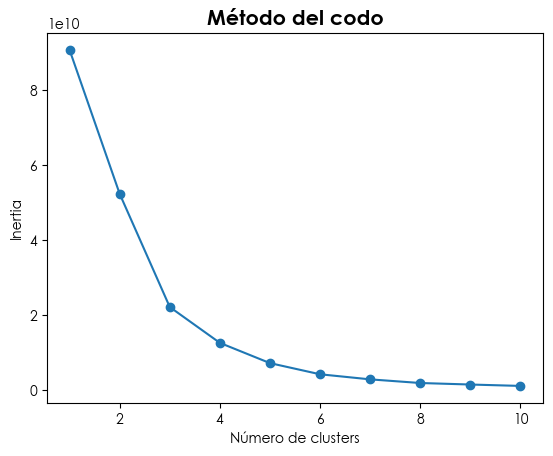

In [94]:
#Gráfica de codo para determinar número de clusters
plt.rcParams["font.family"] = "Century Gothic"
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(colonias[variables])
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método del codo", fontsize=15,fontweight="bold")
plt.xlabel("Número de clusters")
plt.ylabel("Inertia")


In [95]:
# Clusterizar colonias
kmeans=KMeans(n_clusters=3, random_state=0)
colonias["cluster"]=kmeans.fit_predict(colonias[variables])
colonias

C:\Users\claud\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


objectid     cve_col  id_col               colonia     cp cve_ent  \
0        17211  15037_0001   17211  Retama(Huixquilucan)   5210      15   
1        39705  15001_0005   39705             Esperanza  50320      15   
2        39725  15001_0008   39725            Los Cedros  50320      15   
3        39727  15001_0009   39727             Los Pinos  50300      15   
4        39732  15001_0011   39732      Peñascos de Dios  50300      15   
...        ...         ...     ...                   ...    ...     ...   
1734    102145  15106_0380  102145       Real del Bosque  50251      15   
1735    102158  15108_0060  102158        La Providencia  54980      15   
1736    102160  15109_0194  102160  Ex Hda  La Mariscala  54949      15   
1737    102161  15109_0195  102161          Las Terrazas  54549      15   
1738    102165  15115_0007  102165     Villas del Bosque  50260      15   

     nom_ent  mun cve_mun                    nom_mun  ...     ovsint  \
0     México  037   15037               Huixquilucan  ...  25.293382   
1     México  001   15001  Acambay de Ruíz Castañeda  ...  41.002636   
2     México  001   15001  Acambay de Ruíz Castañeda  ...  75.436882   
3     México  001   15001  Acambay de Ruíz Castañeda  ...  44.780949   
4     México  001   15001  Acambay de Ruíz Castañeda  ...  44.742044   
...      ...  ...     ...                        ...  ...        ...   
1734  México  106   15106                     Toluca  ...  37.374792   
1735  México  108   15108                   Tultepec  ...  43.030475   
1736  México  109   15109                  Tultitlán  ...  34.776840   
1737  México  109   15109                  Tultitlán  ...  34.776842   
1738  México  115   15115                 Xonacatlán  ...  43.169600   

         ovscel     im_2020 gm_2020  imn_2020           clasif  \
0      7.773166  149.344060   Medio  0.952158          Colonia   
1      6.602650  149.022966   Medio  0.950111          Colonia   
2      2.924152  148.135038   Medio  0.944450          Colonia   
3      7.767686  149.536570   Medio  0.953385          Colonia   
4      9.164911  149.752536   Medio  0.954762          Colonia   
...         ...         ...     ...       ...              ...   
1734  10.496661  149.166757   Medio  0.951028  Fraccionamiento   
1735   8.041760  149.365732   Medio  0.952296          Colonia   
1736   9.227986  149.078541   Medio  0.950465  Fraccionamiento   
1737   9.227986  149.078541   Medio  0.950465  Fraccionamiento   
1738   8.010572  148.359654   Medio  0.945882  Fraccionamiento   

                                               geometry  area_km2  \
0     MULTIPOLYGON (((2784098.546 822529.023, 278409...  0.003363   
1     POLYGON ((2725612.077 886055.368, 2725608.370 ...  0.069666   
2     POLYGON ((2726130.040 886049.590, 2726156.914 ...  0.171123   
3     POLYGON ((2725352.742 885843.434, 2725354.755 ...  0.290377   
4     POLYGON ((2725222.438 886221.155, 2725221.012 ...  0.407604   
...                                                 ...       ...   
1734  POLYGON ((2740824.236 809399.826, 2740823.154 ...  0.045705   
1735  POLYGON ((2799282.514 852881.353, 2799230.327 ...  0.030522   
1736  POLYGON ((2799468.818 850011.675, 2799455.911 ...  0.037241   
1737  POLYGON ((2800094.327 850374.154, 2800028.809 ...  0.041647   
1738  POLYGON ((2760271.982 826533.718, 2760256.568 ...  0.034850   

          densidad  cluster  
0     18719.929796        0  
1       489.115216        0  
2       149.503650        0  
3      2335.956745        0  
4      1461.965526        0  
...            ...      ...  
1734   5116.391938        0  
1735   1755.468371        0  
1736   7106.845509        0  
1737   7106.655173        0  
1738   3527.895921        0  

[1739 rows x 35 columns]

In [96]:
#Contar cuántas colonias hay en cada cluster
colonias["cluster"].value_counts()

cluster
0    1603
1     135
2       1
Name: count, dtype: int64

In [97]:
#Obtener cluster de San Carlos Cantera
cluster_scc=colonias[colonias["colonia"]=="Lomas de San Carlos"]["cluster"].values[0]
cluster_scc

0

In [98]:
#Filtrar cluster cero
cluster_objetivo=colonias[colonias["cluster"]==cluster_scc]
#Dejar solo aquellas con población una desviación estándar arriba y abajo de San Carlos Cantera
cluster_objetivo=cluster_objetivo[(cluster_objetivo["pobtot"]>sancarloscantera["pobtot"].sum()-cluster_objetivo["pobtot"].std()) & (cluster_objetivo["pobtot"]<sancarloscantera["pobtot"].sum()+cluster_objetivo["pobtot"].std())]

#Contar cuántas colonias hay en el cluster objetivo
cluster_objetivo["cluster"].value_counts()

cluster
0    243
Name: count, dtype: int64

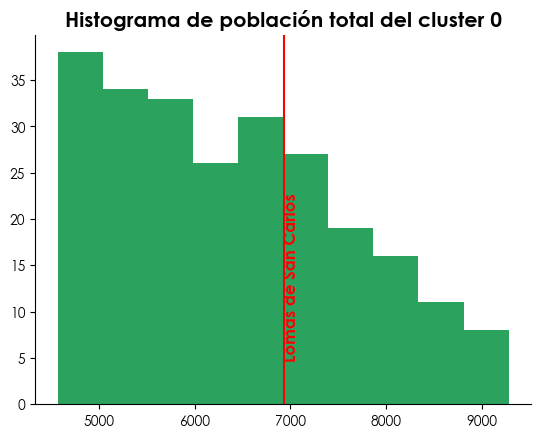

In [99]:
#Histograma de población total del cluster 0
plt.hist(cluster_objetivo["pobtot"],color="#2ca25f")
plt.title("Histograma de población total del cluster 0", fontsize=15,fontweight="bold")
#Línea vertical de San Carlos Cantera
plt.axvline(sancarloscantera["pobtot"].values[0], color="red")
plt.text(sancarloscantera["pobtot"].values[0], 5, "Lomas de San Carlos", rotation=90,color="red", fontsize=12, fontweight="bold")
#Eliminar eje derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

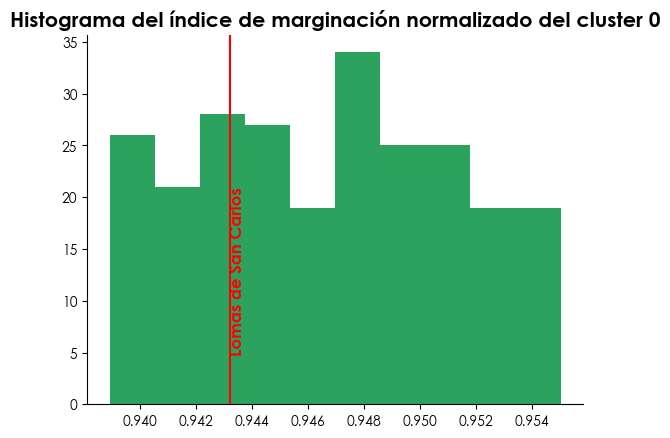

In [100]:
#Histograma del índice de marginación normalizado del cluster 0
plt.hist(cluster_objetivo["imn_2020"], color="#2ca25f")
plt.title("Histograma del índice de marginación normalizado del cluster 0", fontsize=15,fontweight="bold")
#Línea vertical de San Carlos Cantera
plt.axvline(sancarloscantera["imn_2020"].values[0], color="red")
plt.text(sancarloscantera["imn_2020"].values[0], 5, "Lomas de San Carlos", rotation=90, color="red",fontsize=12, fontweight="bold")
#Eliminar eje derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [101]:
cluster_objetivo

objectid     cve_col  id_col                colonia     cp cve_ent  \
15       39775  15002_0019   39775     Mision San Agustin  55885      15   
16       39782  15002_0024   39782            San Bartolo  55880      15   
18       39788  15002_0028   39788  San Miguel Totolcingo  55884      15   
19       39790  15002_0030   39790         Santa Catarina  55875      15   
20       39792  15002_0032   39792              Tetexcala  55886      15   
...        ...         ...     ...                    ...    ...     ...   
1594     45590  15122_0012   45590             Del Carmen  56619      15   
1598     45611  15122_0031   45611     Real de San Martin  56614      15   
1599     45613  15122_0033   45613  San Juan Tlalpizahuac  56618      15   
1604     45634  15123_0001   45634               Luvianos  51440      15   
1687    102012  15088_0021  102012                 Centro  52400      15   

     nom_ent  mun cve_mun                      nom_mun  ...     ovsint  \
15    México  002   15002                      Acolman  ...  43.478246   
16    México  002   15002                      Acolman  ...  58.665203   
18    México  002   15002                      Acolman  ...  51.691727   
19    México  002   15002                      Acolman  ...  48.955051   
20    México  002   15002                      Acolman  ...  51.453287   
...      ...  ...     ...                          ...  ...        ...   
1594  México  122   15122  Valle de Chalco Solidaridad  ...  36.758518   
1598  México  122   15122  Valle de Chalco Solidaridad  ...  44.126303   
1599  México  122   15122  Valle de Chalco Solidaridad  ...  33.553173   
1604  México  123   15123                     Luvianos  ...  60.648102   
1687  México  088   15088                   Tenancingo  ...  31.173543   

         ovscel     im_2020 gm_2020  imn_2020                 clasif  \
15     4.251037  149.443202   Medio  0.952790        Fraccionamiento   
16    12.111753  148.493289   Medio  0.946734                Colonia   
18    10.905776  147.896353   Medio  0.942928                 Pueblo   
19     7.883857  149.095030   Medio  0.950570                Colonia   
20     8.031735  148.544718   Medio  0.947062                Colonia   
...         ...         ...     ...       ...                    ...   
1594   8.376677  147.557464   Medio  0.940767                Colonia   
1598   7.030905  148.145560   Medio  0.944517  Conjunto habitacional   
1599  10.364555  148.156400   Medio  0.944586                Colonia   
1604   8.293280  147.786700   Medio  0.942229                Colonia   
1687  11.130626  147.907852   Medio  0.943001                Colonia   

                                               geometry  area_km2  \
15    POLYGON ((2820654.650 852267.720, 2820583.715 ...  1.532823   
16    POLYGON ((2824962.096 853469.725, 2825164.491 ...  4.652854   
18    POLYGON ((2818524.920 850814.377, 2818413.358 ...  3.185049   
19    POLYGON ((2822369.280 852721.990, 2822355.486 ...  3.633193   
20    POLYGON ((2823206.792 849763.365, 2823206.713 ...  0.838184   
...                                                 ...       ...   
1594  POLYGON ((2819909.990 815934.389, 2819904.550 ...  0.524347   
1598  POLYGON ((2820981.725 811061.167, 2821033.895 ...  0.367825   
1599  POLYGON ((2819711.877 817452.867, 2819678.267 ...  0.554017   
1604  POLYGON ((2679112.910 771184.274, 2679217.699 ...  2.522228   
1687  POLYGON ((2753573.546 776721.282, 2753579.567 ...  0.721587   

          densidad  cluster  
15     4212.778258        0  
16     1427.469924        0  
18     1687.258875        0  
19     1583.094563        0  
20     5911.310525        0  
...            ...      ...  
1594  16082.210002        0  
1598  17715.082248        0  
1599  10818.034243        0  
1604   2783.566163        0  
1687   6948.546698        0  

[243 rows x 35 columns]

#### Clasificación pero utilizando densidad de población

In [102]:
#variables a considerar para clusterización
variables=["imn_2020","densidad"]

C:\Users\claud\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\claud\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\claud\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\claud\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

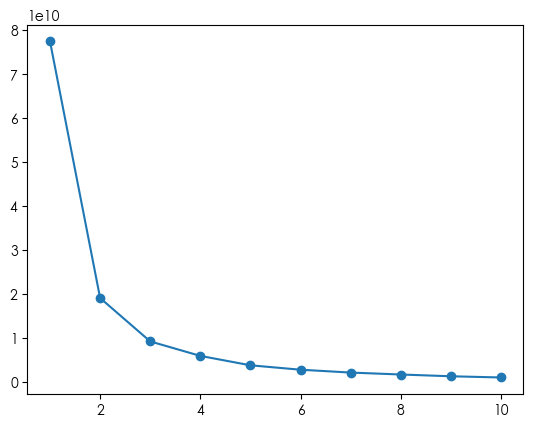

In [103]:
#Gráfica de codo para determinar número de clusters
plt.rcParams["font.family"] = "Century Gothic"
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(colonias[variables])
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')

In [104]:
# Clusterizar colonias
kmeans2=KMeans(n_clusters=3, random_state=0)
colonias["cluster2"]=kmeans2.fit_predict(colonias[variables])

C:\Users\claud\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [105]:
#Contar cuántas colonias hay en cada cluster
colonias["cluster2"].value_counts()

cluster2
1    941
2    448
0    350
Name: count, dtype: int64

In [106]:
#Obtener cluster de San Carlos Cantera
cluster_scc2=colonias[colonias["colonia"]=="Lomas de San Carlos"]["cluster2"].values[0]
cluster_scc2

2

In [107]:
#Filtrar lomas de San Carlos
colonias[colonias["colonia"]=="Lomas de San Carlos"]

objectid     cve_col  id_col              colonia     cp cve_ent nom_ent  \
449     41423  15033_0266   41423  Lomas de San Carlos  55089      15  México   

     mun cve_mun              nom_mun  ...    ovscel    im_2020 gm_2020  \
449  033   15033  Ecatepec de Morelos  ...  8.615278  147.94471   Medio   

     imn_2020   clasif                                           geometry  \
449  0.943236  Colonia  POLYGON ((2808225.418 845891.380, 2808367.462 ...   

     area_km2      densidad  cluster  cluster2  
449  0.536114  12939.791452        0         2  

[1 rows x 36 columns]

In [108]:
#Filtrar cluster dos
cluster_objetivo2=colonias[colonias["cluster2"]==cluster_scc2]
#Dejar solo aquellas con densidad una desviación estándar arriba y abajo de San Carlos Cantera
cluster_objetivo2=cluster_objetivo2[(cluster_objetivo2["densidad"]>sancarloscantera["densidad"].values[0]-cluster_objetivo2["densidad"].std()) & (cluster_objetivo2["densidad"]<sancarloscantera["densidad"].values[0]+cluster_objetivo2["densidad"].std())]

#Contar cuántas colonias hay en el cluster objetivo
cluster_objetivo2["cluster2"].value_counts()


cluster2
2    167
Name: count, dtype: int64

In [133]:
type(cluster_objetivo2)

geopandas.geodataframe.GeoDataFrame

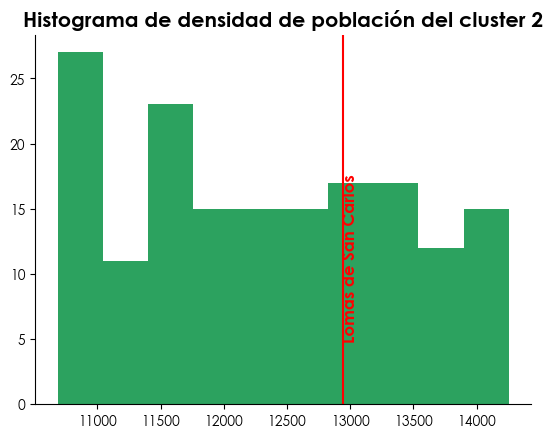

In [109]:
#Histograma de población total del cluster 0
plt.hist(cluster_objetivo2["densidad"],color="#2ca25f")
plt.title("Histograma de densidad de población del cluster 2", fontsize=15,fontweight="bold")
#Línea vertical de San Carlos Cantera
plt.axvline(sancarloscantera["densidad"].values[0], color="red")
plt.text(sancarloscantera["densidad"].values[0], 5, "Lomas de San Carlos", rotation=90,color="red", fontsize=12, fontweight="bold")
#Eliminar eje derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

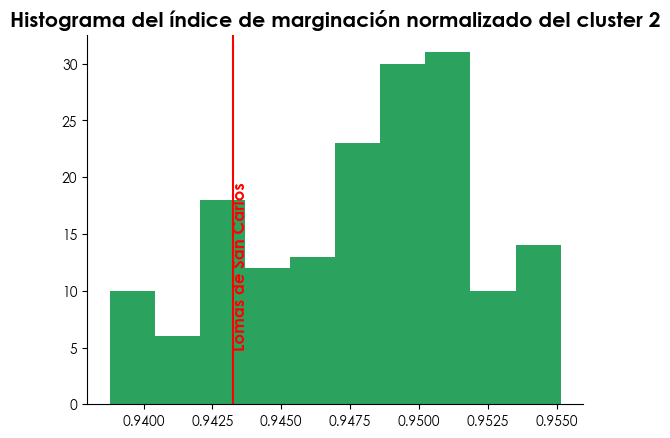

In [110]:
#Histograma del índice de marginación normalizado del cluster 0
plt.hist(cluster_objetivo2["imn_2020"], color="#2ca25f")
plt.title("Histograma del índice de marginación normalizado del cluster 2", fontsize=15,fontweight="bold")
#Línea vertical de San Carlos Cantera
plt.axvline(sancarloscantera["imn_2020"].values[0], color="red")
plt.text(sancarloscantera["imn_2020"].values[0], 5, "Lomas de San Carlos", rotation=90, color="red",fontsize=12, fontweight="bold")
#Eliminar eje derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [173]:
# Coordenadas del centro comunitario
centro_comunitario = [19.577614, -99.056475]

# Transformar a GeoDataFrame
ccgeo = gpd.GeoDataFrame(geometry=gpd.points_from_xy([centro_comunitario[1]], [centro_comunitario[0]]))

# Set the CRS (assuming WGS 84 - EPSG:4326)
ccgeo.set_crs(epsg=4326, inplace=True)

# Utilizar crs de colonias
ccgeo = ccgeo.to_crs(colonias.crs)
ccgeo

geometry
0  POINT (-99.05648 19.57761)

In [190]:
#Sacar buffer
colonias_utm = colonias.to_crs(epsg=32614)
ccgeo_utm = ccgeo.to_crs(epsg=32614)

buffer = ccgeo_utm.buffer(2000)  


# Obtener las colonias que intersectan con el buffer
colonias_in_buffer = gpd.sjoin(colonias_utm, gpd.GeoDataFrame(geometry=buffer), how="inner", predicate="intersects")

colonias_in_buffer = colonias_in_buffer.to_crs(epsg=4326)
buffer = buffer.to_crs(epsg=4326)


#Contar colonias y población total
print("Colonias en buffer: ", len(colonias_in_buffer))
print("Población total en buffer: ", colonias_in_buffer["pobtot"].sum())
print("Densidad de población en buffer: ", colonias_in_buffer["pobtot"].sum()/buffer.area.values[0])

Colonias en buffer:  25
Población total en buffer:  67460.099671
Densidad de población en buffer:  62402798.68565433


C:\Users\claud\AppData\Local\Temp\ipykernel_17764\2479845129.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("Densidad de población en buffer: ", colonias_in_buffer["pobtot"].sum()/buffer.area.values[0])


#### Mapa de colonias con características similares a San Carlos Cantera

In [111]:
#Leer capa de municipios
mun=gpd.read_file("data/conjunto_de_datos/15mun.shp")

In [116]:
# Función para colores
def style_function(feature):
    if feature['properties']['colonia'] == 'Lomas de San Carlos':
        return {'color': 'red'}
    else:
        return {'color': 'blue'} 
    
def style_function2(feature):
    if feature['properties']['colonia'] == 'Lomas de San Carlos':
        return {'color': 'green'}
    else:
        return {'color': 'yellow'} 

In [193]:
m = folium.Map(location=[19.5814982, -99.0611739], zoom_start=12, tiles=None, control_scale=True)


folium.TileLayer(
    tiles='cartodbpositron',
    attr='CartoDB',
    name='CartoDB',  
    overlay=False,  
    control=True
).add_to(m)

# Google Hybrid
folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
    attr='Google',
    name='Google Hybrid',
    overlay=False,  
    control=True
).add_to(m)

#Centro comunitario
folium.GeoJson(
    ccgeo,
    name="Centro comunitario",
    style_function=lambda x: {
        'color': 'black',  
        'weight': 1.5,  
        'fillColor': 'transparent',  
        'fillOpacity': 0  
    },
    overlay=True,
    show=True
).add_to(m)


#Añadir buffer
folium.GeoJson(
    buffer,
    name="Buffer",
    style_function=lambda x: {
        'color': 'black',  
        'weight': 1.5,  
        'fillColor': 'transparent',  
        'fillOpacity': 0  
    },
    overlay=True,
    show=False
).add_to(m)

#Colonias en buffer
folium.GeoJson(
    colonias_in_buffer,
    name="Colonias en buffer",
    style_function=
    lambda x: {
        'color': 'green'
        },
        
    overlay=True, 
    show=False
).add_to(m)


# Capa municipios
folium.GeoJson(
    mun,
    name="Municipios",
    style_function=lambda x: {
        'color': 'black',  
        'weight': 1.5,  
        'fillColor': 'transparent',  
        'fillOpacity': 0 
    },
    overlay=True,
    show=True
).add_to(m)

# Tooltips
tooltip = folium.GeoJsonTooltip(
    fields=["colonia", "nom_mun", "pobtot", "imn_2020", "gm_2020"],
    aliases=["Colonia", "Municipio", "Población total", "Índice de marginación normalizado", "Grado de marginación"],
    style=("background-color: white; color: black; font-family: 'Century Gothic'; font-size: 12px; padding: 5px;")
)
tooltip2 = folium.GeoJsonTooltip(
    fields=["colonia", "nom_mun", "pobtot", "imn_2020", "gm_2020"],
    aliases=["Colonia", "Municipio", "Población total", "Índice de marginación normalizado", "Grado de marginación"],
    style=("background-color: white; color: black; font-family: 'Century Gothic'; font-size: 12px; padding: 5px;")
)
# Capa colonias similares
folium.GeoJson(
    cluster_objetivo,
    name="Colonias similares utilizando población",
    style_function=style_function,
    tooltip=tooltip,
    overlay=True,
    show=False,
).add_to(m)

folium.GeoJson(
    cluster_objetivo2,
    name="Colonias similares utilizando densidad",
    style_function=style_function2,
    tooltip=tooltip2,
    overlay=True,
    show=False,
).add_to(m)

# Añadir manzanas de San Carlos Cantera
folium.GeoJson(sancarlosmza,
               name="Manzanas",
               style_function=lambda x: {
        'color': 'purple',  
        'weight': 1.5,  
        'fillColor': 'transparent',  
        'fillOpacity': 0  
    },
               tooltip=folium.GeoJsonTooltip(fields=["cvegeo"], aliases=["Clave de la manzana: "], style=("background-color: white; color: black; font-family: 'Century Gothic'; font-size: 12px; padding: 5px;")),
               overlay=True,
               show=True
               ).add_to(m)



folium.LayerControl(collapsed=False).add_to(m)

# Salvar
m.save("colonias_similares_sancarloscantera.html")

m
